<a href="https://colab.research.google.com/github/helenaortizz/TFM/blob/main/Analisis_Exploratorio_de_los_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFM: MODELO PREDICTIVO DE PARTO PRETÉRMINO

## 1. Carga de librerías necesarias

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

## 2. Carga del dataset

In [19]:
# Cargar el dataset
file_path = "/content/drive/MyDrive/parto_pretermino_dataset.csv"
df = pd.read_csv(file_path)

# Mostrar primeras filas
print(df.head())

# Información general del dataset
print(df.info())

# Número de filas y columnas
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

   Mother_Age  Mother_Race  Mother_Education  Total_Birth_Order  \
0           6            3                 7                  3   
1           4            5                 5                  3   
2           3            1                 4                  4   
3           3            1                 5                  4   
4           6            4                 2                  2   

   Interval_Last_Pregnancy  Prenatal_Care_Start  Smoking_Before_Pregnancy  \
0                        8                    1                         0   
1                        2                    1                         0   
2                        2                    1                         0   
3                        2                    1                         0   
4                        5                    1                         0   

   BMI Gestational_Diabetes Gestational_Hypertension Previous_Preterm_Birth  \
0    2                    N                        N   

## 3. Inspección del dataset

In [20]:
# Revisar valores únicos en variables categóricas
categorical_cols = ['Gestational_Diabetes', 'Gestational_Hypertension', 'Previous_Preterm_Birth',
                    'Previous_Cesarean', 'Chorioamnionitis', 'Mother_Age', 'Mother_Race',
                    'Mother_Education', 'Total_Birth_Order', 'Prenatal_Care_Start',
                    'BMI', 'No_Risk_Factors', 'No_Infections', 'Fetal_Presentation',
                    'Plurality', 'Gestation_Weeks']

for col in categorical_cols:
    print(f"\nValores únicos en {col}:")
    print(df[col].value_counts(dropna=False))  # Mostrar también valores NaN


Valores únicos en Gestational_Diabetes:
Gestational_Diabetes
N    3301992
Y     297144
U       5945
Name: count, dtype: int64

Valores únicos en Gestational_Hypertension:
Gestational_Hypertension
N    3236823
Y     362313
U       5945
Name: count, dtype: int64

Valores únicos en Previous_Preterm_Birth:
Previous_Preterm_Birth
N    3456630
Y     142506
U       5945
Name: count, dtype: int64

Valores únicos en Previous_Cesarean:
Previous_Cesarean
N    3045864
Y     553272
U       5945
Name: count, dtype: int64

Valores únicos en Chorioamnionitis:
Chorioamnionitis
N    3539254
Y      63617
U       2210
Name: count, dtype: int64

Valores únicos en Mother_Age:
Mother_Age
5    1101031
4     989251
3     618002
6     606309
2     141208
7     136708
8       9556
1       1768
9       1248
Name: count, dtype: int64

Valores únicos en Mother_Race:
Mother_Race
1    2664977
2     555059
4     229548
6     106215
3      35131
5      14151
Name: count, dtype: int64

Valores únicos en Mother_Educatio

## 4. Resumen estadístico de las variables

In [21]:
# Resumen de variables numéricas
print(df.describe())

# Resumen de variables categóricas
print(df.describe(include=['object', 'category']))

         Mother_Age   Mother_Race  Mother_Education  Total_Birth_Order  \
count  3.605081e+06  3.605081e+06      3.605081e+06       3.605081e+06   
mean   4.516636e+00  1.527490e+00      4.529594e+00       2.579147e+00   
std    1.198372e+00  1.134518e+00      1.854134e+00       1.694012e+00   
min    1.000000e+00  1.000000e+00      1.000000e+00       1.000000e+00   
25%    4.000000e+00  1.000000e+00      3.000000e+00       1.000000e+00   
50%    5.000000e+00  1.000000e+00      4.000000e+00       2.000000e+00   
75%    5.000000e+00  2.000000e+00      6.000000e+00       3.000000e+00   
max    9.000000e+00  6.000000e+00      9.000000e+00       9.000000e+00   

       Interval_Last_Pregnancy  Prenatal_Care_Start  Smoking_Before_Pregnancy  \
count             3.605081e+06         3.605081e+06              3.605081e+06   
mean              7.248223e+01         1.401277e+00              1.044104e-01   
std               3.388880e+01         8.328000e-01              5.809940e-01   
min      

## 5. Análisis de valores nulos

In [22]:
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
Mother_Age                  0
Mother_Race                 0
Mother_Education            0
Total_Birth_Order           0
Interval_Last_Pregnancy     0
Prenatal_Care_Start         0
Smoking_Before_Pregnancy    0
BMI                         0
Gestational_Diabetes        0
Gestational_Hypertension    0
Previous_Preterm_Birth      0
Previous_Cesarean           0
No_Risk_Factors             0
No_Infections               0
Chorioamnionitis            0
Fetal_Presentation          0
Plurality                   0
Gestation_Weeks             0
dtype: int64


## 6. Conversión de variables categóricas y binarias

In [23]:
# Definir mapeos para variables categóricas
age_mapping = {1: "<15", 2: "15-19", 3: "20-24", 4: "25-29", 5: "30-34",
               6: "35-39", 7: "40-44", 8: "45-49", 9: "50-54"}
race_mapping = {1: "White", 2: "Black", 3: "AIAN", 4: "Asian", 5: "NHOPI", 6: "Multiracial"}
education_mapping = {1: "≤8th", 2: "9-12_no_diploma", 3: "HS_diploma", 4: "Some_college"}
bmi_mapping = {1: "Underweight", 2: "Normal", 3: "Overweight", 4: "Obesity_I",
               5: "Obesity_II", 6: "Extreme_Obesity", 9: "Unknown"}
binary_mapping = {'Y': 1, 'N': 0}  # Eliminamos 'U' en binarios

# Aplicar las conversiones
df['Mother_Age'] = df['Mother_Age'].map(age_mapping)
df['Mother_Race'] = df['Mother_Race'].map(race_mapping)
df['Mother_Education'] = df['Mother_Education'].map(education_mapping)
df['BMI'] = df['BMI'].map(bmi_mapping)

# Convertir variables binarias
binary_cols = ['Gestational_Diabetes', 'Gestational_Hypertension', 'Previous_Preterm_Birth',
               'Previous_Cesarean', 'Chorioamnionitis']

for col in binary_cols:
    df[col] = df[col].map(binary_mapping)

# Convertir a tipo 'category' para reducir uso de memoria
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verificar cambios
print("\nDatos después de la conversión:")
print(df.head())
print(df.dtypes)


Datos después de la conversión:
  Mother_Age Mother_Race Mother_Education Total_Birth_Order  \
0      35-39        AIAN              NaN                 3   
1      25-29       NHOPI              NaN                 3   
2      20-24       White     Some_college                 4   
3      20-24       White              NaN                 4   
4      35-39       Asian  9-12_no_diploma                 2   

   Interval_Last_Pregnancy Prenatal_Care_Start  Smoking_Before_Pregnancy  \
0                        8                   1                         0   
1                        2                   1                         0   
2                        2                   1                         0   
3                        2                   1                         0   
4                        5                   1                         0   

         BMI Gestational_Diabetes Gestational_Hypertension  \
0     Normal                  0.0                      0.0   
1  Obes

## 7. Manejo de valores nulos

In [24]:
# Imputar valores nulos en 'Mother_Education' con la moda (o 'Unknown' si la moda no está definida)
if df['Mother_Education'].mode().empty:
    df['Mother_Education'] = df['Mother_Education'].fillna("Unknown")
else:
    df['Mother_Education'] = df['Mother_Education'].fillna(df['Mother_Education'].mode()[0])

# Imputar variables binarias con la moda (evitando problemas con NaN)
for col in binary_cols:
    if df[col].mode().empty:
        df[col] = df[col].fillna(0)  # Asigna 0 si la moda no está definida
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Eliminar filas con más de 2 valores nulos
df_clean = df.dropna(thresh=len(df.columns) - 2)

# Verificar valores nulos restantes
print("\nValores faltantes después de limpieza:")
print(df_clean.isnull().sum())


Valores faltantes después de limpieza:
Mother_Age                  0
Mother_Race                 0
Mother_Education            0
Total_Birth_Order           0
Interval_Last_Pregnancy     0
Prenatal_Care_Start         0
Smoking_Before_Pregnancy    0
BMI                         0
Gestational_Diabetes        0
Gestational_Hypertension    0
Previous_Preterm_Birth      0
Previous_Cesarean           0
No_Risk_Factors             0
No_Infections               0
Chorioamnionitis            0
Fetal_Presentation          0
Plurality                   0
Gestation_Weeks             0
dtype: int64


## 8. Definición de la variable objetivo

In [25]:
# Convertir la variable objetivo
gestation_mapping = {1: 1, 2: 0, 3: None}
df_clean['Gestation_Weeks'] = df_clean['Gestation_Weeks'].map(gestation_mapping)

# Eliminar filas con Gestation_Weeks desconocido
df_clean = df_clean.dropna(subset=['Gestation_Weeks'])

# Verificar distribución de la variable objetivo
print("\nDistribución de la variable objetivo:")
print(df_clean['Gestation_Weeks'].value_counts(normalize=True))


Distribución de la variable objetivo:
Gestation_Weeks
0.0    0.877667
1.0    0.122333
Name: proportion, dtype: float64


## 8. Distribución de variables

### 8.1. Distribución de variables categóricas

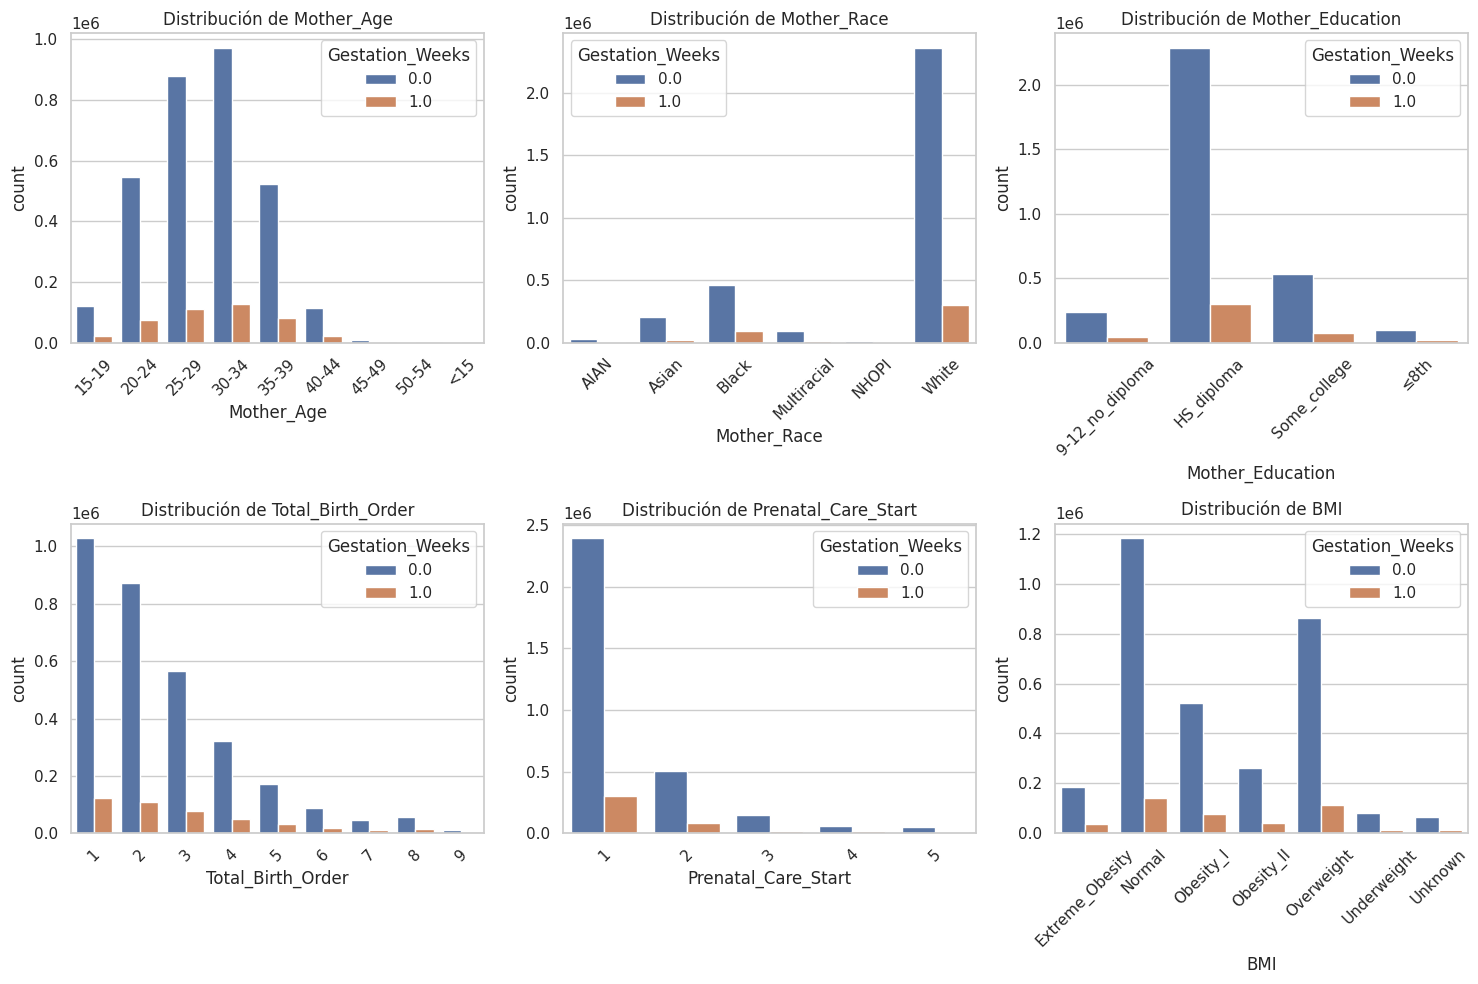

In [26]:
# Distribución de las variables categóricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_clean.select_dtypes(include=['category']).columns[:6], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df_clean, hue='Gestation_Weeks')
    plt.xticks(rotation=45)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

### 8.2 Distribución de variables numéricas

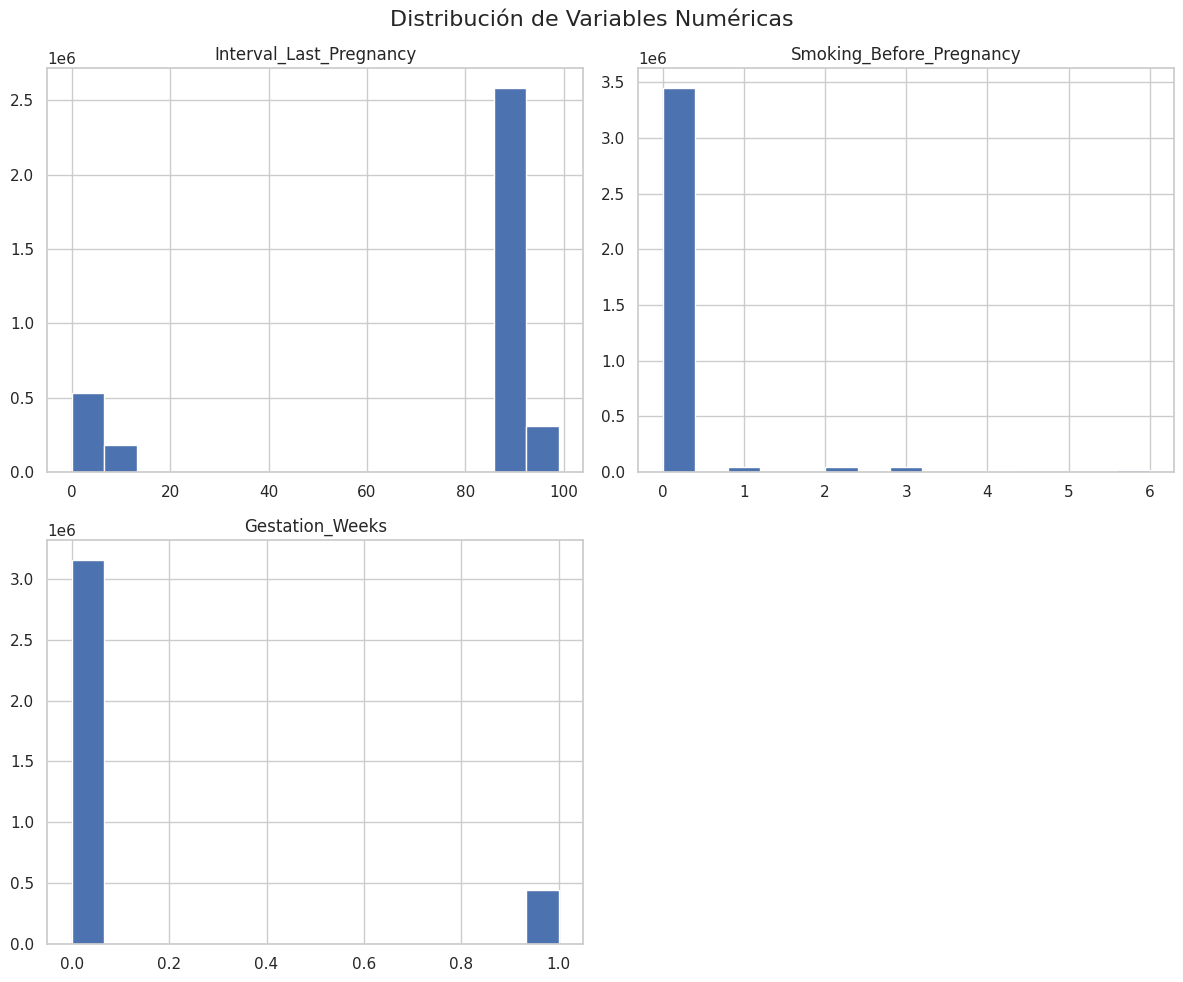

In [27]:
# Histograma para variables numéricas
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean[numeric_cols].hist(bins=15, figsize=(12, 10))
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

### 8.3. Matriz de correlación

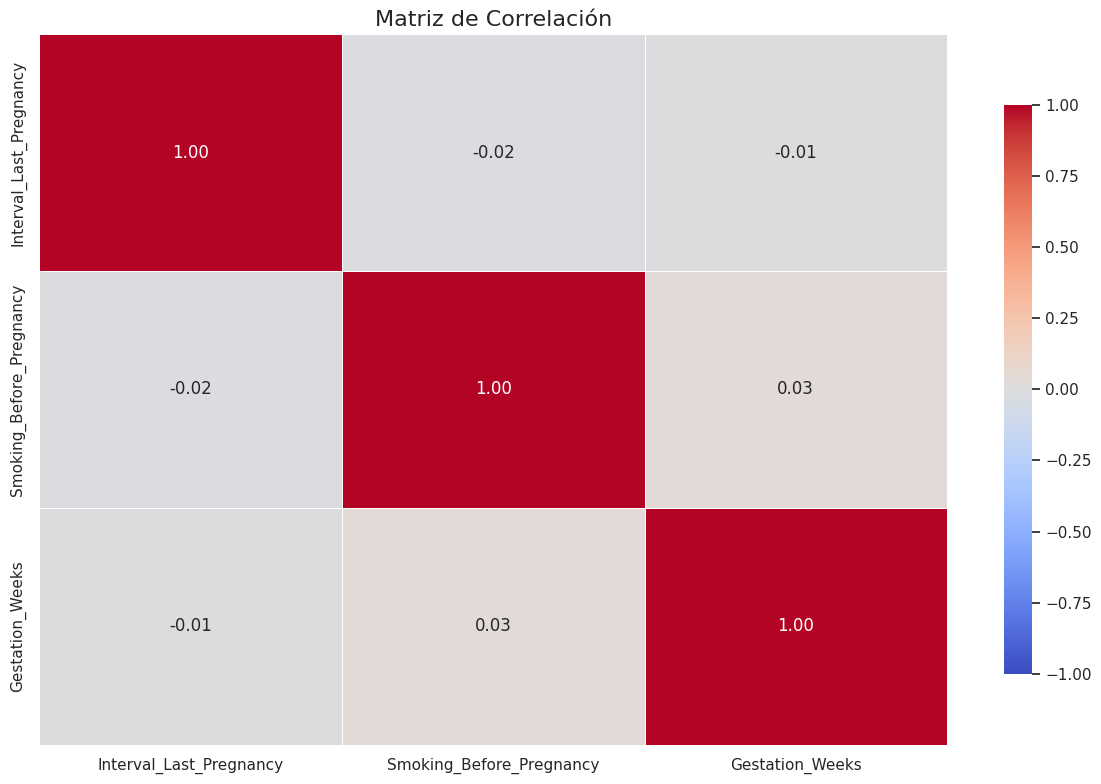

In [37]:
# Matriz de correlación
corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación', fontsize=16)
plt.tight_layout()
plt.show()